In [1]:
import requests
from pathlib import Path
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import os


# Download Asylum Descision Dataset from UNHRC

We request 15 years of data from 2008-2023

In [2]:
file_path="asylum_decisions_2008-2023.json"
with open(file_path) as jsonfile:
     data = json.load(jsonfile)
#data=json.loads(file_path)
df_asylum_decisions = pd.DataFrame(data)

df_asylum_decisions.head()

,year,coo_name,coo_iso,coa_name,coa_iso,dec_recognized,dec_other,dec_rejected,dec_closed,dec_total
0,2008,Afghanistan,AFG,Australia,AUS,5,0,0,0,5
1,2008,Albania,ALB,Australia,AUS,5,0,5,0,10
2,2008,Egypt,EGY,Australia,AUS,10,0,17,0,27
3,2008,Bahrain,BHR,Australia,AUS,0,0,5,0,5
4,2008,Bangladesh,BGD,Australia,AUS,11,0,59,87,157


In [3]:
columnsForEdit = ['year', 'dec_recognized', 'dec_other', 'dec_rejected', 'dec_closed', 'dec_total']
df_asylum_decisions[columnsForEdit] = df_asylum_decisions[columnsForEdit].astype(int)
df_asylum_decisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73296 entries, 0 to 73295
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            73296 non-null  int32 
 1   coo_name        73296 non-null  object
 2   coo_iso         73296 non-null  object
 3   coa_name        73296 non-null  object
 4   coa_iso         73296 non-null  object
 5   dec_recognized  73296 non-null  int32 
 6   dec_other       73296 non-null  int32 
 7   dec_rejected    73296 non-null  int32 
 8   dec_closed      73296 non-null  int32 
 9   dec_total       73296 non-null  int32 
dtypes: int32(6), object(4)
memory usage: 3.9+ MB


In [4]:
df_asylum_decisions


,year,coo_name,coo_iso,coa_name,coa_iso,dec_recognized,dec_other,dec_rejected,dec_closed,dec_total
0,2008,Afghanistan,AFG,Australia,AUS,5,0,0,0,5
1,2008,Albania,ALB,Australia,AUS,5,0,5,0,10
2,2008,Egypt,EGY,Australia,AUS,10,0,17,0,27
3,2008,Bahrain,BHR,Australia,AUS,0,0,5,0,5
4,2008,Bangladesh,BGD,Australia,AUS,11,0,59,87,157
...,...,...,...,...,...,...,...,...,...,...
73291,2023,Iran (Islamic Rep. of),IRN,Indonesia,IDN,5,0,0,0,5
73292,2023,Sudan,SDN,Jordan,JOR,0,0,0,5,5
73293,2023,Yemen,YEM,Syrian Arab Rep.,SYR,5,0,0,0,5
73294,2023,Pakistan,PAK,Thailand,THA,0,0,0,5,5


In [5]:


df_asylum_decisions_reduced=df_asylum_decisions[["year","coo_name","dec_total"]]
#df=df_asylum_decisions_reduced.groupby(['year'])
df_asylum_decisions_reduced.head(10)

,year,coo_name,dec_total
0,2008,Afghanistan,5
1,2008,Albania,10
2,2008,Egypt,27
3,2008,Bahrain,5
4,2008,Bangladesh,157
5,2008,Cambodia,5
6,2008,China,926
7,2008,Chile,5
8,2008,Cameroon,5
9,2008,Colombia,10


Asylum application received from major countires of origin from 2008 to 2023

Text(0.5, 1.0, ' asylum applications from major coo |2008- 2023')

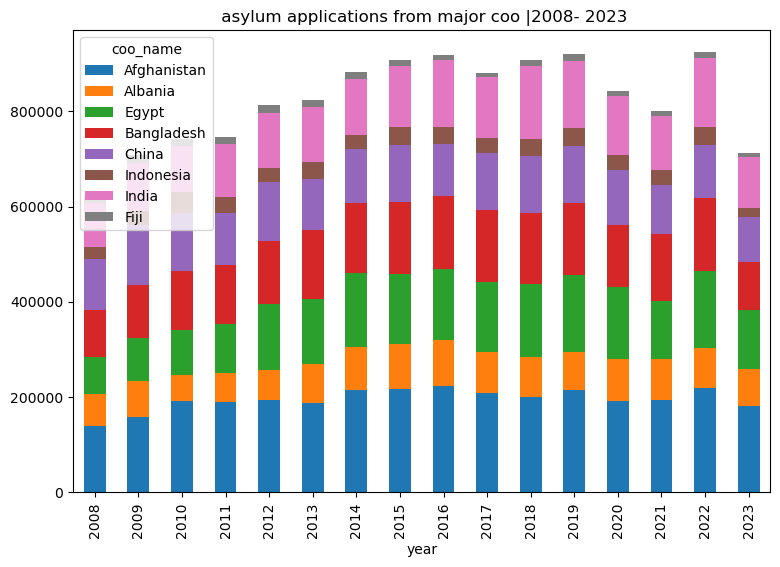

In [6]:
df2 =df_asylum_decisions_reduced.groupby(['year','coo_name'])['year'].sum().unstack('coo_name')
df2[['Afghanistan','Albania','Egypt','Bangladesh','China','Indonesia','India','Fiji']].plot(kind='bar', stacked=True,figsize=(9, 6))
plt.title(' asylum applications from major coo |2008- 2023')

Asylum applicants in major countries of aylum from 2008 to 2023

Text(0, 0.5, 'Number of applications')

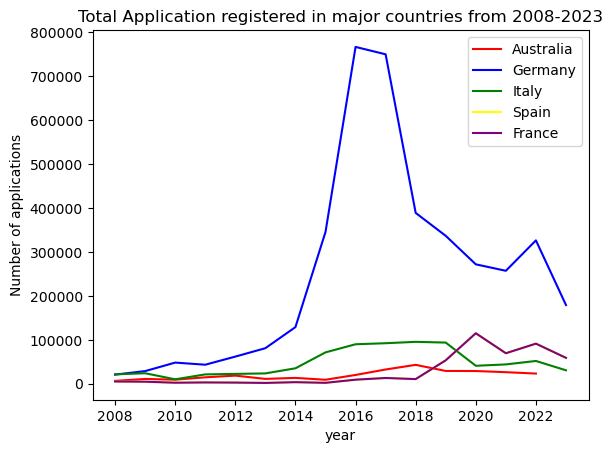

In [86]:
df1=df_asylum_decisions.loc[df_asylum_decisions['coa_name']=='Australia',['coa_name','year','dec_total']]
df2=df_asylum_decisions.loc[df_asylum_decisions['coa_name']=='Germany',['coa_name','year','dec_total']]
df3=df_asylum_decisions.loc[df_asylum_decisions['coa_name']=='Italy',['coa_name','year','dec_total']]
df4=df_asylum_decisions.loc[df_asylum_decisions['coa_name']=='Spain',['coa_name','year','dec_total']]
df5=df_asylum_decisions.loc[df_asylum_decisions['coa_name']=='France',['coa_name','year','dec_total']]
australia,=plt.plot(df1.groupby('year')['dec_total'].sum(),color='red',label='Australia')
germany,=plt.plot(df2.groupby('year')['dec_total'].sum(),color='blue',label='Germany')
italy,=plt.plot(df3.groupby('year')['dec_total'].sum(),color='green',label='Italy')
spain,=plt.plot(df4.groupby('year')['dec_total'].sum(),color='yellow',label='Spain')
france,=plt.plot(df4.groupby('year')['dec_total'].sum(),color='purple',label='France')
plt.legend(handles=[australia, germany,italy,spain,france], loc="best")
plt.title('Total Application registered in major countries from 2008-2023')
plt.xlabel('year')
plt.ylabel('Number of applications')

<Axes: xlabel='coa_name,year'>

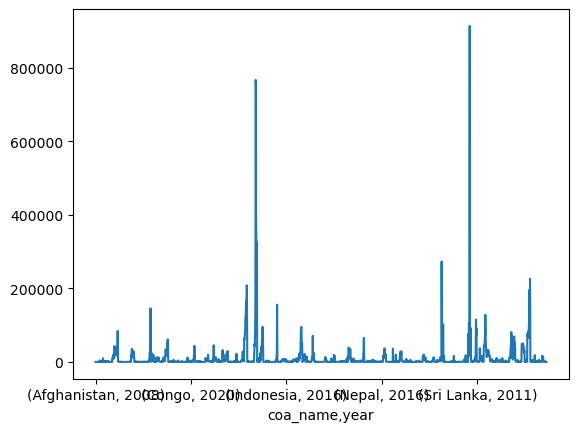

In [26]:
df_asylum_groupby_coa.plot(kind='line')


# View Country Border GeoJSON Dataset

Downloaded from [https://github.com/datasets/geo-countries](https://github.com/datasets/geo-countries) which is a GeoJSON converted dataset sourced from [Natural Earth](https://www.naturalearthdata.com/).

In [3]:
countries

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."
...,...,...,...,...
250,Samoa,WSM,WS,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,Yemen,YEM,YE,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,South Africa,ZAF,ZA,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,Zambia,ZMB,ZM,"MULTIPOLYGON (((31.11984 -8.61663, 31.14102 -8..."


<Axes: >

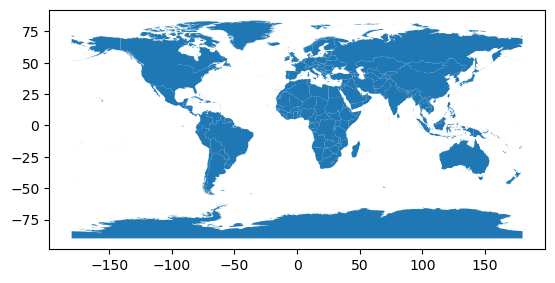

In [4]:
countries.plot()